#  Challenge (Pie chart plotting)
-  create a new data frame (df) that is going to contain all businesses from states
- filter above df by "Restaurant" category
- chose on of the categories from filtered table and plot a pie chart that shows the ration between top 10 cities based on chosen category

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
b_df =  pd.read_csv('business.csv')
states = pd.read_csv ('states.csv')
states.columns = ['state_name', 'state']

In [3]:
states.head(3)

,state_name,state
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ


In [4]:
b_df.head(3)

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC


In [5]:
bs_df = pd.merge(b_df,states)
bs_df.head(1)

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,state_name
0,0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ,Arizona


In [6]:
un_state = list (b_df['state'].unique())
all_states = list(states['state'])

In [8]:
not_usa = []
for state in un_state:
    if state not in all_states:
        not_usa.append(state)
print(not_usa)

['ON', 'AB', 'QC', 'BAS', 'XGM', 'XWY', 'CON', 'BC', 'DUR', 'XGL', 'DOW']


In [10]:
us_b_df = b_df[b_df['state'].isin(all_states)]
us_b_df.categories.unique()

array(['Golf, Active Life', 'Sushi Bars, Restaurants, Japanese',
       'Insurance, Financial Services', ...,
       'Golf, Hotels, Day Spas, Hotels & Travel, Event Planning & Services, Beauty & Spas, Active Life, Venues & Event Spaces, Resorts',
       'Water Purification Services, Water Heater Installation/Repair, Home Services, Plumbing',
       'Home Services, Contractors, Landscaping, Masonry/Concrete, Landscape Architects'],
      dtype=object)

In [11]:
print (len(us_b_df))
print (len(b_df))

141954
192609


In [13]:
us_b_df = us_b_df.dropna(subset=['categories'])
restaurants1 = us_b_df[us_b_df['categories'].str.contains("Restaurants")]
restaurants1.head(2)

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
2,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ


In [14]:
rs1= restaurants1

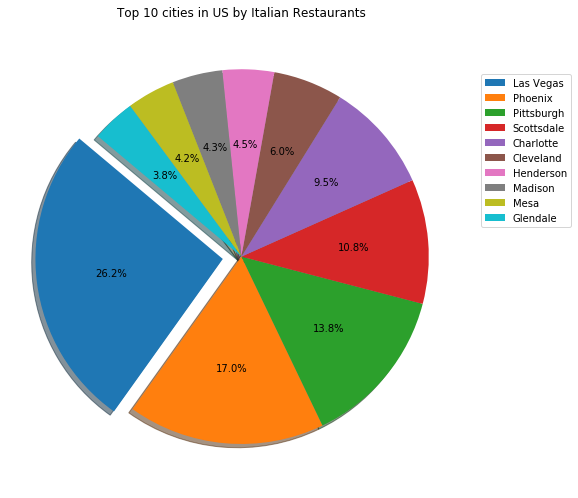

In [45]:
rs1['attributes'].unique()
rs1[['attributes','categories', 'city' ]]
rs1.head(4)



rs1cut=rs1[rs1['categories'].str.contains("Italian")][["attributes",'categories','name','city']]
ntrs1=rs1cut.groupby('city')['categories'].count().sort_values(ascending =False).head(10)
labels = ntrs1.keys()
pie_df = rs1cut.groupby('city')['categories'].count().sort_values(ascending =False).head(10).plot(
    kind = 'Pie', autopct='%.1f%%', figsize=(7,10), labels=None,shadow=True, startangle=140, explode=(0.1, 0, 0, 0,0,0,0,0,0,0),
title = 'Top 10 cities in US by Italian Restaurants')
plt.tight_layout()
plt.legend(labels=labels,bbox_to_anchor=(1, 0.9), loc='upper left', ncol=1)
pie_df.set_ylabel('')
plt.show()